**Problem**

Detecting fraudulent transactions is a critical yet challenging task in modern financial systems. With the rise of online transactions, fraudulent activities have become more frequent and sophisticated.

Traditional supervised machine learning approaches require labeled datasets where fraudulent and legitimate transactions are explicitly identified. However, in real-world scenarios, such labeled data is often limited, highly imbalanced, or unavailable. This raises the need for unsupervised methods that can detect anomalies in the data without prior knowledge of labels.

The primary challenge lies in accurately identifying fraudulent transactions while minimizing false positives and ensuring scalability for large datasets.

***Objectives***

1. Accuracy & Early Detection - Identify fraudulent transactions with minimal false positives and false negatives.

2. Real-time Processing - Ensure timely detection and response to fraud in real-time transactions.

3. Scalability - Handle large transaction volumes efficiently using distributed computing frameworks.

4. Robustness to Evolving Fraud Patterns - Adapt models to detect new and emerging fraud techniques.

5. Explainability & Interpretability - Provide insights into why a transaction was flagged as fraudulent.

6. Minimizing Financial Loss & Risk - Reduce the financial impact of fraud on businesses and customers.

7. Automated Decision-Making - Implement automated fraud prevention measures while allowing manual review for high-risk cases.

## **Step 1: IMPORT NECESSARY LIBRARIES**

I start by importing necessary libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (scikit-learn).

The dataset is loaded and split into training and testing sets using train_test_split, ensuring a fair representation of fraud cases. Data preprocessing techniques such as StandardScaler, Normalizer, and MinMaxScaler are used to standardize and normalize features, which helps improve model performance.

It employs anomaly detection methods like LocalOutlierFactor (LOF) and SGDOneClassSVM to identify fraudulent transactions based on deviations from normal transaction patterns. It evaluates the models using metrics such as classification_report, accuracy_score, confusion_matrix, and f1_score, which provide insights into fraud detection performance. Additionally, t-SNE is used for dimensionality reduction, enabling visualization of high-dimensional data in a 2D space to better understand fraud patterns. This comprehensive approach ensures effective fraud detection by combining preprocessing, anomaly detection, and model evaluation techniques.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn import linear_model
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer, MinMaxScaler

**READING DATA**

In [ ]:
# Loading the data
data = pd.read_csv('/content/Credit card.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())

Memory usage         67.36 MB
Dataset shape    (284807, 31)


This code loads a credit card transaction dataset into a Pandas DataFrame using pd.read_csv() and provides insights into its size and memory consumption.

The dataset consists of **284,807 rows** and **31 columns**, likely containing transaction details such as amount, time, and fraud labels. The memory usage calculation, data.memory_usage().sum()/(1024*1024), reveals that the dataset occupies 67.36 MB in RAM. This information is crucial for optimizing memory usage, handling large datasets efficiently, and planning for scalability, especially if real-time fraud detection is required.

Understanding the dataset's shape and memory footprint helps in deciding preprocessing steps, feature engineering strategies, and whether distributed computing frameworks like Apache Spark are needed for large-scale analysis.

## **Step 2: INITIAL DATA ANALYSIS**

Initial Data Analysis (IDA) is a critical step in any data-driven project to understand the dataset's structure, quality, and potential insights before applying advanced analytics or machine learning models

In [ ]:
data.head() #Displaying the first five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail() #Displaying the first five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info() #provides a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape #Displaying number of rows and columns

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.describe().style.set_sticky(axis="index").background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


The **data.describe().style.set_sticky(axis="index").background_gradient()** command generates a summary of statistical metrics (like mean, standard deviation, min, and max) for numerical columns using data.describe(). Th**e .set_sticky(axis="index") **ensures the index (row labels) remains fixed when scrolling, making it easier to read, while .**background_gradient()** adds color gradients to highlight patterns in the data. This helps in quickly identifying outliers, trends, and distributions across different features.

**Visualize Time series**

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


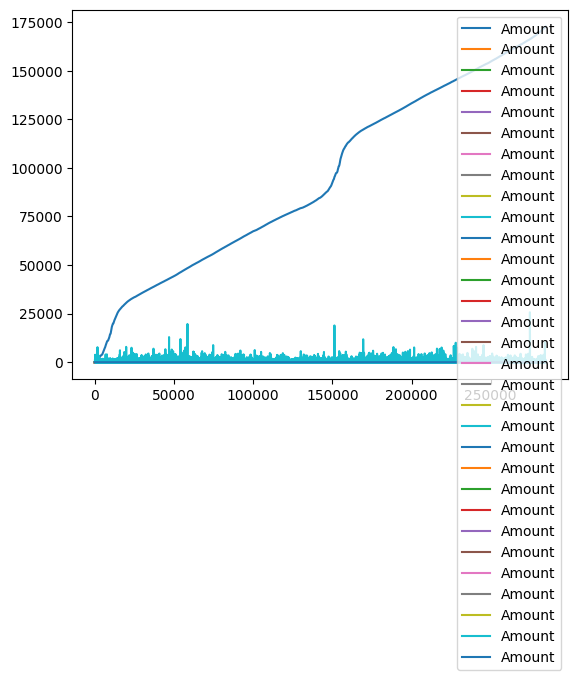

In [ ]:
plt.plot(data, label='Amount')
plt.legend()

**Summary Statistics**

In [ ]:
data.describe().T # Summary statistics for numerical variables

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#Summary statistics for categorical variables
# Check if there are any object columns before calling describe
if data.select_dtypes(include=['object']).empty:
    print("No categorical columns found in the DataFrame.")
else:
    display(data.describe(include='object').T)

No categorical columns found in the DataFrame.


## **Step 3: DATA CLEANING & TRANSFORMATION**

It encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

**Handling Missing Values**

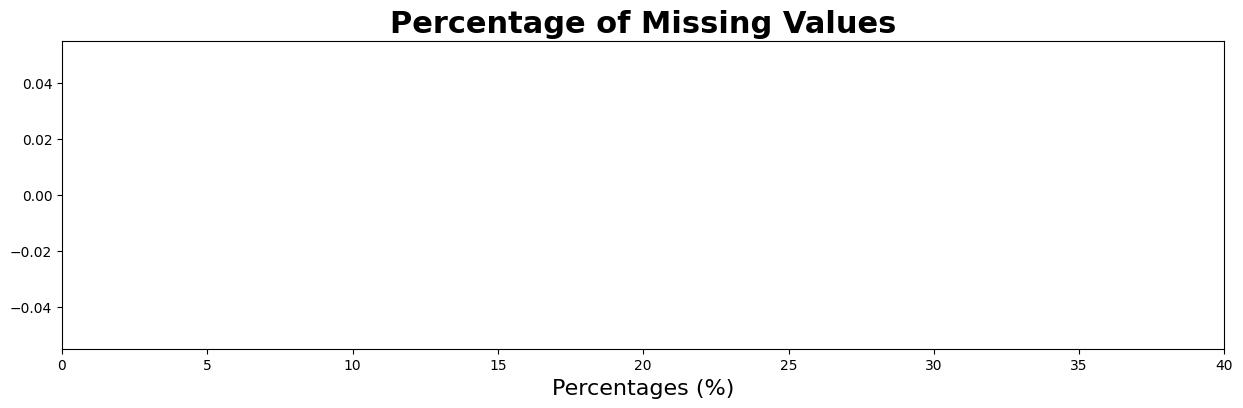

In [ ]:
#Calculating the percentage of missing values for each column
missing_data = data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / data.shape[0]) * 100

#Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
#Extracting rows with missing values
data[data['V1'].isnull() | data['Class'].isnull()].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
#Verifying the removal of missing values
data.isnull().sum().sum()

np.int64(0)

**Handling duplicates**

Am going to recognize duplicate rows in the dataset

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = data[data.duplicated(keep=False)]

# Sorting the data by columns from V1 to Amount
columns_to_sort = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                   'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                   'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Sorting duplicate rows by the selected columns
duplicate_rows_sorted = duplicate_rows.sort_values(by=columns_to_sort)

# Displaying the first 10 records
duplicate_rows_sorted.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151006,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
151007,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
151008,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
151009,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
70031,53680.0,-20.351845,-14.505648,-9.273317,5.969783,-4.080790,0.055006,2.960865,-0.044541,1.834025,...,-2.215718,-0.503187,-5.686236,0.625375,-1.194445,-0.710817,-1.213041,-2.356710,9.00,0
70032,53680.0,-20.351845,-14.505648,-9.273317,5.969783,-4.080790,0.055006,2.960865,-0.044541,1.834025,...,-2.215718,-0.503187,-5.686236,0.625375,-1.194445,-0.710817,-1.213041,-2.356710,9.00,0
70033,53680.0,-20.157597,-14.199711,-9.409153,5.894616,-4.771555,0.524714,3.605348,-0.174961,1.795886,...,-2.307127,-0.447549,-5.630904,0.635225,-1.169644,-0.690689,-1.035043,-2.431931,164.03,0
70034,53680.0,-20.157597,-14.199711,-9.409153,5.894616,-4.771555,0.524714,3.605348,-0.174961,1.795886,...,-2.307127,-0.447549,-5.630904,0.635225,-1.169644,-0.690689,-1.035043,-2.431931,164.03,0
70026,53679.0,-18.368805,-15.289166,-5.540904,4.956355,1.905676,-2.607517,-0.389734,-1.432355,2.434117,...,-2.374757,-1.650551,-12.476093,0.927273,-1.620140,-0.814197,-0.305056,-2.123351,201.10,0
70027,53679.0,-18.368805,-15.289166,-5.540904,4.956355,1.905676,-2.607517,-0.389734,-1.432355,2.434117,...,-2.374757,-1.650551,-12.476093,0.927273,-1.620140,-0.814197,-0.305056,-2.123351,201.10,0


In [ ]:
# Displaying the number of duplicate rows
print(f"The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
data.drop_duplicates(inplace=True)

The dataset contains 1081 duplicate rows that need to be removed.


In [ ]:
#Getting the number of rows in the dataframe
data.shape[0]

283726

## ***Step 4: DATA SPLITTING ***

In [ ]:
# Function to split data into train, validation, and test sets for both authentic and fraudulent transactions
df_cleaned = data.dropna(subset=["Class"])

# Separate features and target variable
X = df_cleaned.drop(columns=["Class"])
y = df_cleaned["Class"]

# Perform stratified split for train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Further split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Print dataset shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")

Training set: (181584, 30), Validation set: (45396, 30), Testing set: (56746, 30)


This indicates the shapes of the training, validation and testing datasets used in the machine learning model. The training set consists of 181,584 samples, each with 30 features (dimensions),validation consists of45,396 samples with 30 features while the testing set contains 56,746 samples, also with 30 features.

This suggests that the dataset is likely structured with 30 distinct features or variables that are being used to train and evaluate the model. The training set is typically larger than the testing set to allow the model to learn from a diverse range of data, while the testing set is used to assess the model's performance on unseen data.

The balance in the number of features (30) across both sets suggests a consistent data structure, which is critical for the proper evaluation of the model's generalization ability.

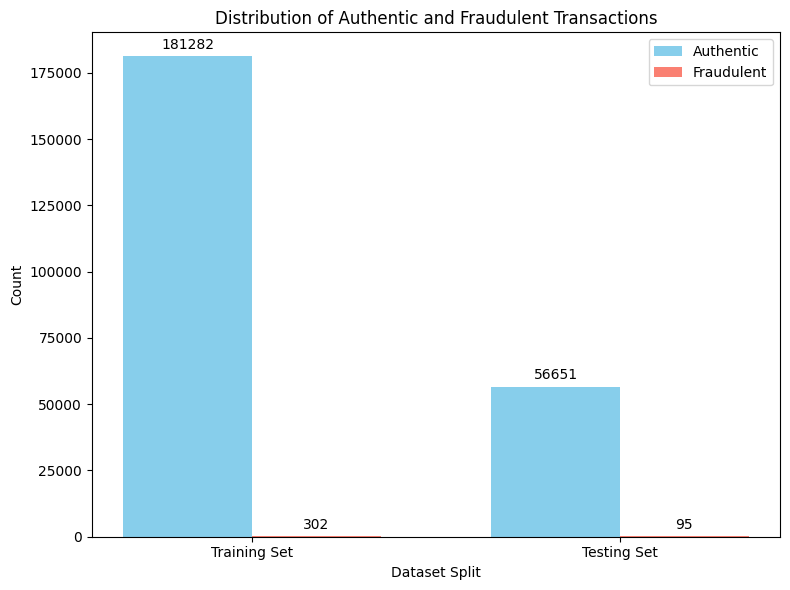

In [ ]:
# Count authentic (0) and fraudulent (1) transactions in each set
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

authentic_counts = [train_counts.get(0, 0), test_counts.get(0, 0)]
fraudulent_counts = [train_counts.get(1, 0), test_counts.get(1, 0)]
labels = ["Training Set", "Testing Set"]

# Setting up bar chart positions
x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

# Creating the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, authentic_counts, width, label='Authentic', color='skyblue')
bars2 = ax.bar(x + width/2, fraudulent_counts, width, label='Fraudulent', color='salmon')

# Adding titles and labels
ax.set_xlabel('Dataset Split')
ax.set_ylabel('Count')
ax.set_title('Distribution of Authentic and Fraudulent Transactions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the bar chart
plt.tight_layout()
plt.show()

The bar chart visualizes the distribution of authentic (Class = 0) and fraudulent (Class = 1) transactions across the training, validation, and test sets. It helps assess whether the data is evenly split and if fraud cases are sufficiently represented for model evaluation. The x-axis represents the dataset splits (Train, Validation, Test), while the y-axis shows the number of transactions in each category.

Two bars are plotted for each dataset split:

1. One bar for authentic transactions (majority class, typically much higher).

2. One bar for fraudulent transactions (minority class, showing imbalance).

This visualization is essential to check if the model has enough fraud samples to learn from, ensuring effective fraud detection.

In [ ]:
# Output results for verification
print(f"Training set size (authentic): {X_train_auth.shape[0]}")
print(f"Validation set size (authentic + fraudulent): {X_val.shape[0]}")
print(f"Test set size (authentic + fraudulent): {X_test.shape[0]}")

Training set size (authentic): 226602
Validation set size (authentic + fraudulent): 45396
Test set size (authentic + fraudulent): 56746


The output provides the sizes of the datasets used in the model for training, validation, and testing in the context of detecting fraudulent credit transactions. The training set, consisting of 226,602 authentic transactions, is used to train the model on legitimate behavior. The validation set, which contains 45,396 transactions (a mix of both authentic and fraudulent), is used to fine-tune the model and assess its performance during training.

The test set, consisting of 56,746 transactions (again a mixture of authentic and fraudulent), is used to evaluate the model's ability to generalize and detect fraud on unseen data. These dataset sizes reflect a structured approach to ensure that the model is properly trained, validated, and tested, with a sufficient number of samples from both authentic and fraudulent transactions for effective learning and evaluation.

## **Step 5: EXPLORATORY ANALYSIS (EDA)**

In [ ]:
# Decompose 'Time' into Day, Hour, Minute, and Second
def decompose_time(data):
    # Calculate day, hour, minute, and second components
    data['Day'], temp = divmod(data['Time'], 24*60*60)
    data['Hour'], temp = divmod(temp, 60*60)
    data['Minute'], data['Second'] = divmod(temp, 60)

# Apply decomposition to the datasets (use appropriate variables from your split data)
decompose_time(X_train_auth)
decompose_time(X_val)
decompose_time(X_test)

# Preview the decomposition of the 'Time' column in the training dataset
X_train_auth[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

,Time,Day,Hour,Minute,Second
226238,144549.0,1.0,16.0,9.0,9.0
134253,80716.0,0.0,22.0,25.0,16.0
186465,127116.0,1.0,11.0,18.0,36.0
149493,91342.0,1.0,1.0,22.0,22.0
18461,29522.0,0.0,8.0,12.0,2.0


This function decomposes the Time feature into Day, Hour, Minute, and Second components to better capture temporal patterns in transactions. It uses the **divmod()** function to iteratively extract each time unit from the total Time value, which is measured in seconds since the dataset's starting point.

The function is applied to training, validation, and test sets to maintain consistency. By breaking down Time, models can identify fraudulent activities based on time-based trends (e.g., fraud happening more frequently at night). Finally, a preview of the transformed dataset ensures correct implementation.

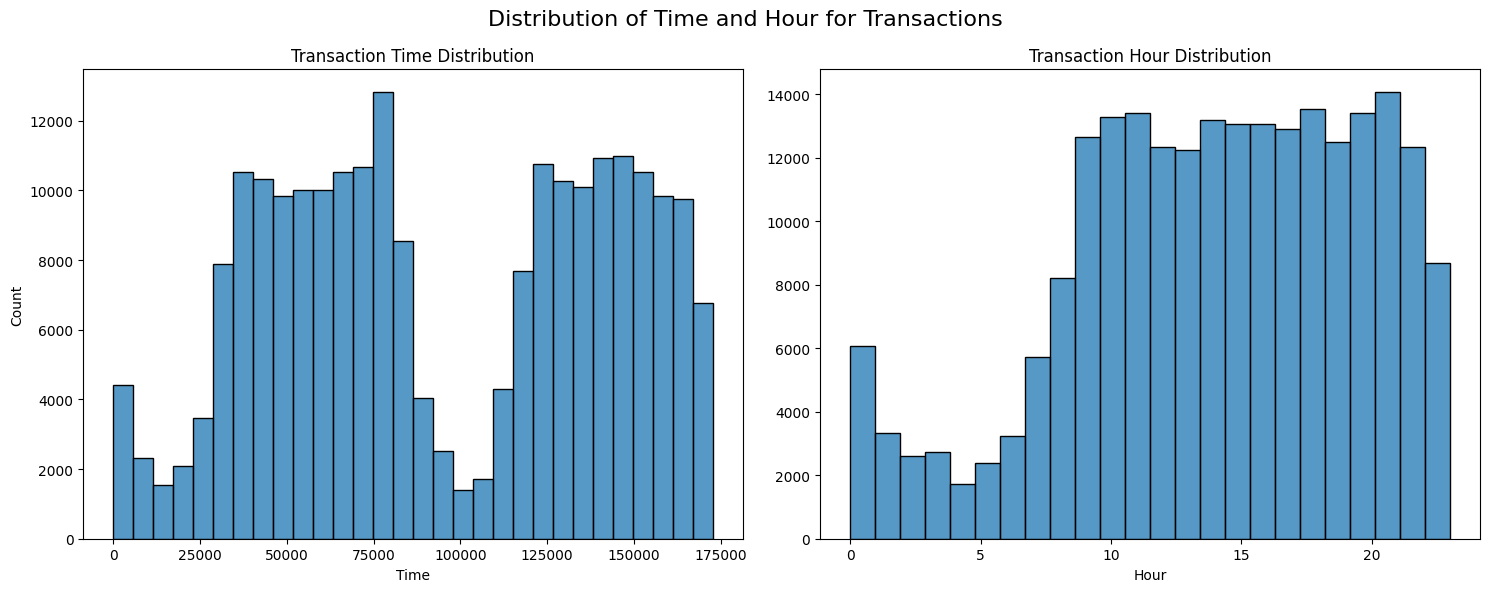

In [ ]:
# Plotting: Histograms of 'Time' and 'Hour'
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Histogram for 'Time' feature
sns.histplot(data=X_train_auth, x='Time', bins=30, ax=ax[0])
ax[0].set_title("Transaction Time Distribution")

# Histogram for 'Hour' feature
sns.histplot(data=X_train_auth, x='Hour', bins=24, ax=ax[1])
ax[1].set_title("Transaction Hour Distribution")
ax[1].set_ylabel("")  # Remove the redundant ylabel for the second plot

# Adjust the layout and show the plot
plt.suptitle("Distribution of Time and Hour for Transactions", size=16)
plt.tight_layout()
plt.show()

This two histograms shows the distribution of transaction times.

The **left plot** represents the distribution of transactions over the entire recorded time period (in seconds). Peaks in this distribution suggest certain periods had more transaction activity, possibly indicating high-traffic hours.

The **right plot** shows the distribution of transactions by hour of the day, providing a clearer view of when transactions occur most frequently. It appears that transactions are more frequent during business hours (10 AM - 8 PM) and less frequent late at night (midnight - early morning).

These insights help identify patterns in transaction behavior and detect unusual activity, which is useful in fraud detection

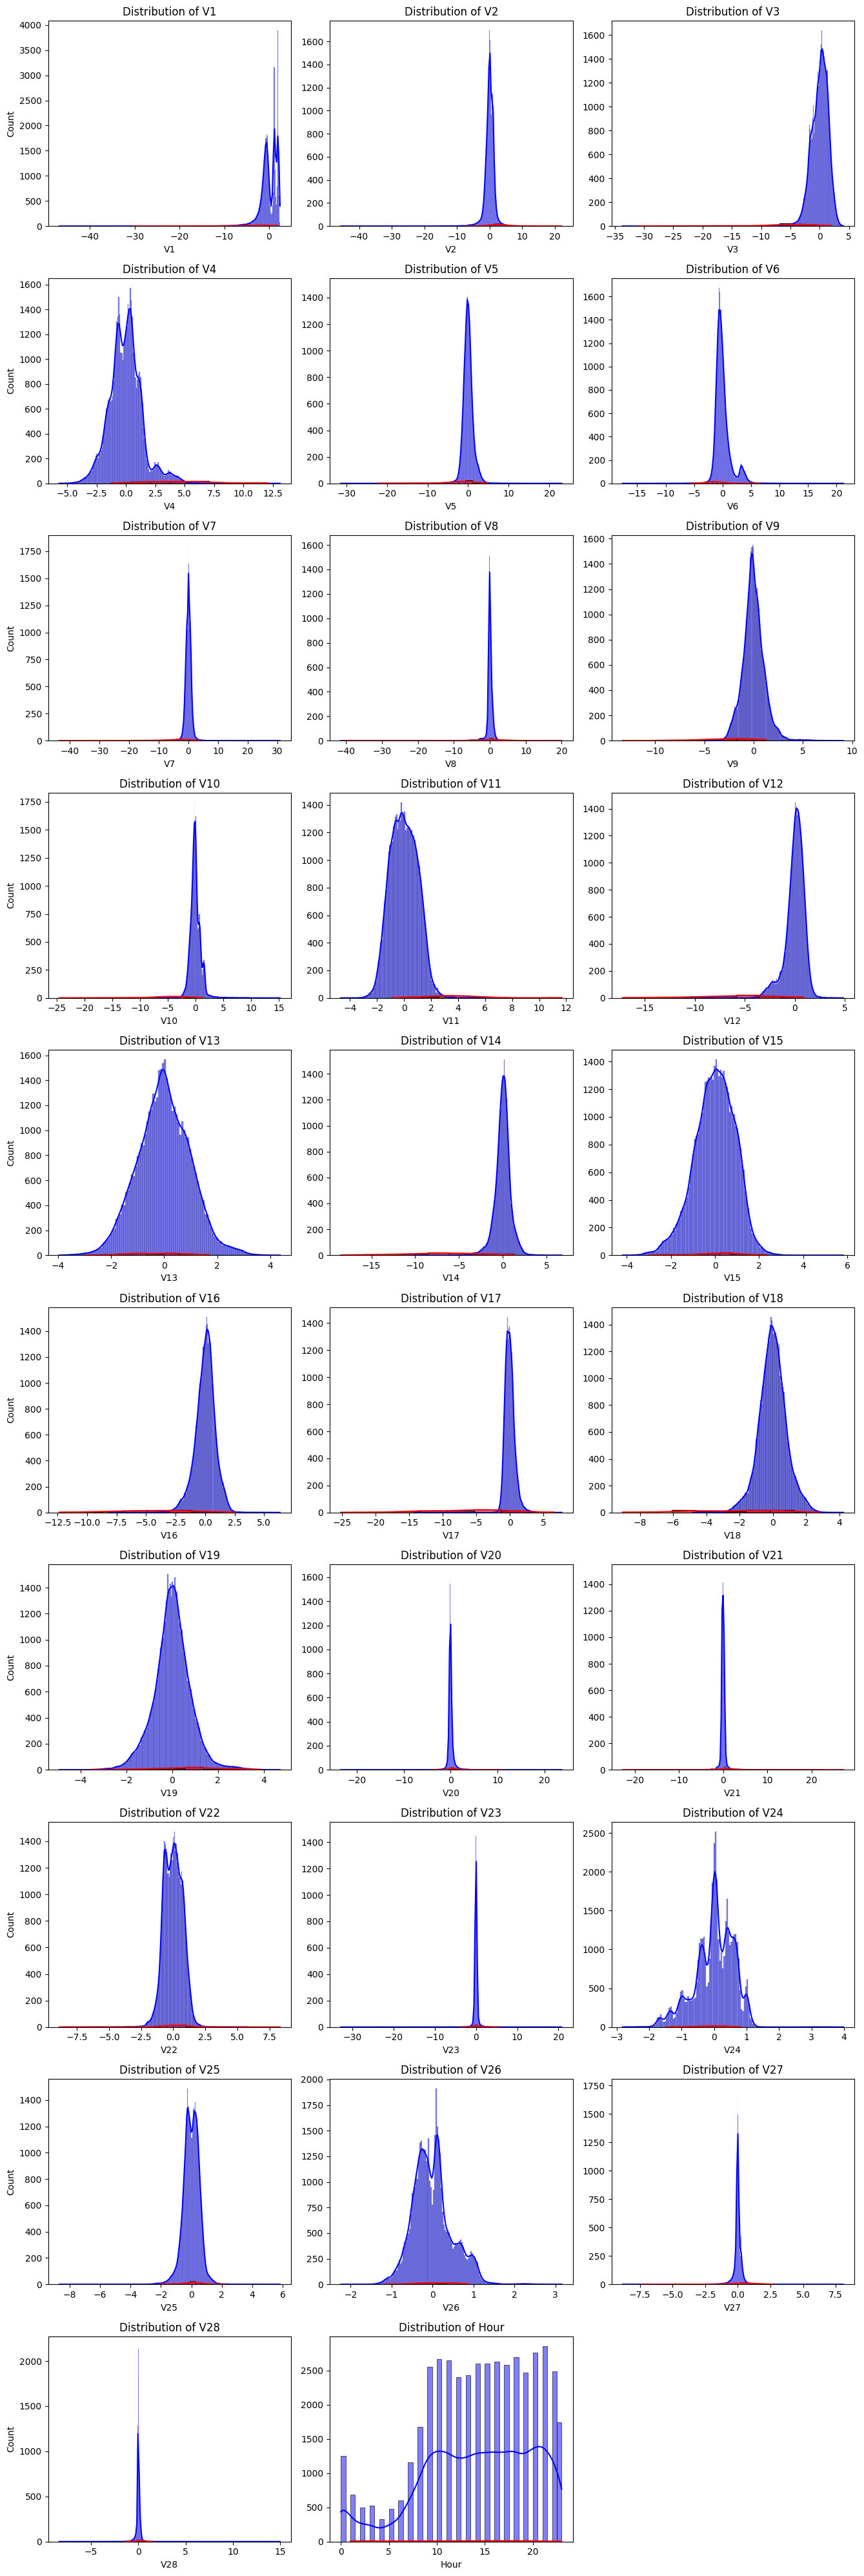

In [ ]:
# Concatenate validation data with target labels (Class)
data_val = pd.concat([X_val, y_val], axis=1)

# Split data into authentic (Class = 0) and fraudulent (Class = 1) transactions
authentic_data = data_val[data_val['Class'] == 0]
fraudulent_data = data_val[data_val['Class'] == 1]

# List of feature columns to plot
feature_columns = list(X_val.columns)

# Define nrows (number of rows in the subplot grid)
ncols = 3  # Number of columns, you can adjust as needed
nrows = int(np.ceil(len(feature_columns) / ncols))  # Calculate rows based on columns and features

# Create the subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(4.5 * ncols, 4 * nrows))

# Flatten the axes array for easier indexing (to handle multi-row, multi-column)
ax = ax.flatten()

# Loop through each feature column to plot KDE for both classes
for i, feature in enumerate(feature_columns):
    sns.histplot(authentic_data[feature], ax=ax[i], kde=True, label='Authentic', color='blue')
    sns.histplot(fraudulent_data[feature], ax=ax[i], kde=True, label='Fraudulent', color='red')

    # Set titles and remove redundant y-axis labels
    ax[i].set_title(f'Distribution of {feature}')
    if i % ncols != 0:
        ax[i].set_ylabel('')

# Remove empty subplots if any (if there are more subplots than features)
for i in range(len(feature_columns), len(ax)):
    fig.delaxes(ax[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

This code snippet is visualizing the distributions of features in the validation dataset (X_val) for both authentic and fraudulent transactions. First, the validation data (X_val) is combined with the corresponding target labels (y_val) to create a single dataset (data_val).

The data is then split into two subsets: one for authentic transactions (Class = 0) and another for fraudulent transactions (Class = 1). The feature columns from the validation data are extracted, and the subplots are created to display the distribution of each feature.

Using seaborn's histplot, the code plots the Kernel Density Estimate (KDE) for each feature, showing the distribution for both authentic and fraudulent transactions in different colors (blue for authentic and red for fraudulent). The subplots are arranged in a grid, and unnecessary y-axis labels are removed for a cleaner visual.

 The layout is adjusted to prevent overlapping of the plots, ensuring that the final output provides a clear comparison between the two classes for each feature. This visualization helps in understanding how different features vary between authentic and fraudulent transactions, providing insights into potential patterns or anomalies that the model can learn from.

**Correlation Matrix**

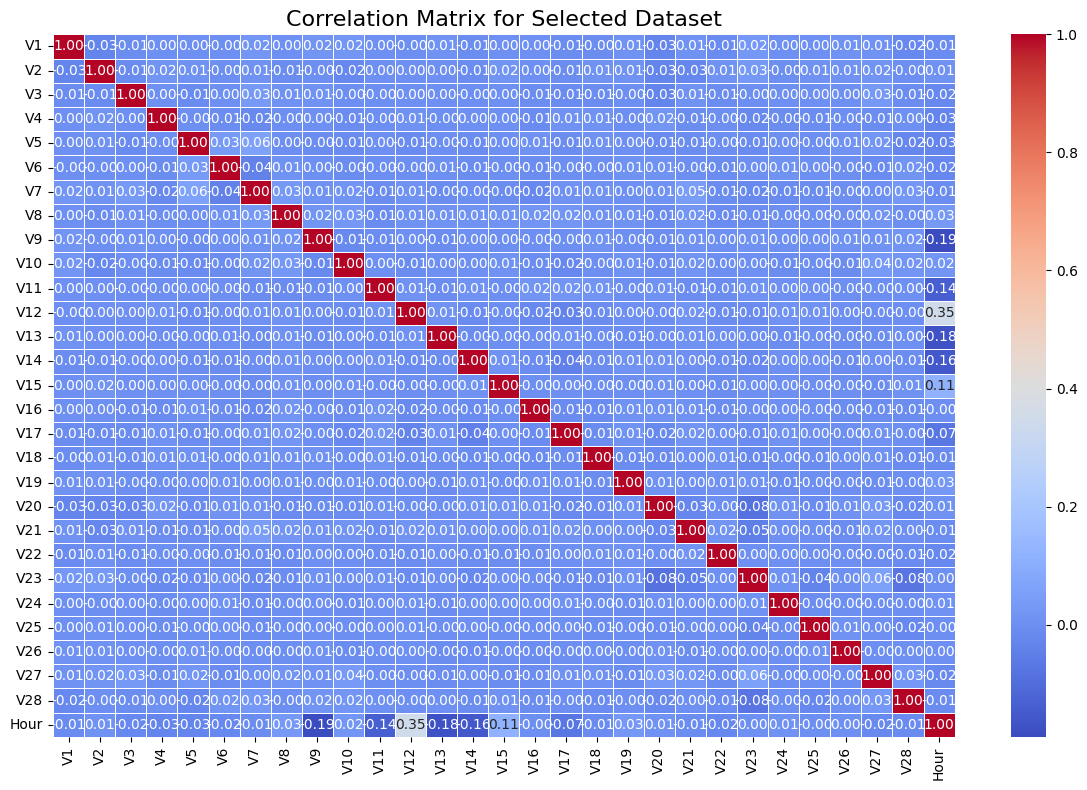

In [ ]:
# Select the dataset you want to plot the correlation matrix for (X_train, X_val, X_test)
data_to_plot = X_val

# Compute the correlation matrix
correlation_matrix = data_to_plot.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Selected Dataset", size=16)
plt.tight_layout()
plt.show()

This is a correlation matrix heatmap, where each cell represents the correlation between two features in the X_val dataset. The color intensity indicates the strength and direction of the correlation: **dark red** signifies a strong positive correlation (close to +1), **dark blue** represents a strong negative correlation (close to -1), and **lighter colors** indicate weak or no correlation (near 0).

Annotated values provide precise correlation coefficients for better interpretation. This visualization helps identify highly correlated features, which may indicate feature redundancy or potential multicollinearity issues, suggesting that some features could be removed or transformed. Additionally, strong correlations between certain features and fraud-related variables (if available) may highlight useful predictors for fraud detection.

Overall, this heatmap aids in feature selection, data understanding, and improving model performance by revealing relationships within the dataset.

## **Step 6: MODEL EVALUATION**

In [ ]:
# Get all the columns from the X_val dataframe
columns = X_val.columns.tolist()

# Filter the columns to remove 'Class' as it is not part of the features
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting (Target column)
target = "Class"
X = X_val[columns]  # Use X_val for outlier detection
Y = y_val  # Use the corresponding target (y_val)

# Define a random state for reproducibility
state = np.random.RandomState(42)

This code snippet prepares the validation dataset (X_val) for use in an outlier detection or machine learning model by organizing the features and target variables.

 It first retrieves the column names from X_val into a list and filters out the Class column, which represents the target variable (fraudulent vs. authentic transactions), as it's not part of the input features. The features are then assigned to X, and the target labels (from y_val) are assigned to Y.

 The Class column is stored separately as the variable target. To ensure reproducibility of any random processes (such as splitting or initializing models), a random state (np.random.RandomState(42)) is set.

 This approach helps maintain consistency in model training and evaluation, ensuring that the same results can be obtained in future runs. The setup prepares the data for subsequent outlier detection or machine learning steps, using X for the input features and Y for the target labels.

In [ ]:
# Initialize classifiers for outlier detection
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples='auto',
                                       contamination=0.05, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=0.05),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                         max_iter=-1)  # No random_state here
}


In [ ]:
# Run each classifier and evaluate performance
for clf_name, clf in classifiers.items():
    # Ensure we pass data with feature names (DataFrame, not NumPy array)
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)  # Predictions are -1 (outlier) and 1 (inlier)
        scores_prediction = clf.negative_outlier_factor_  # Score for each point
    elif clf_name == "Support Vector Machine":
        clf.fit(X)  # Fit the model
        y_pred = clf.predict(X)  # Prediction: 1 for normal, -1 for outlier
    else:
        clf.fit(X)  # Fit the Isolation Forest model
        scores_prediction = clf.decision_function(X)  # Get decision function values
        y_pred = clf.predict(X)  # 1 for normal, -1 for outlier

    # Reshape predictions (convert to 0 for normal and 1 for outlier)
    y_pred[y_pred == 1] = 0  # Normal transactions = 0
    y_pred[y_pred == -1] = 1  # Outliers = 1

    # Calculate the number of errors (where prediction differs from actual label)
    n_errors = (y_pred != Y).sum()

    # Display the metrics
    print(f"{clf_name}: {n_errors} errors")
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))

Isolation Forest: 2212 errors
Accuracy Score:
0.9512732399330337
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     45320
           1       0.03      0.88      0.06        76

    accuracy                           0.95     45396
   macro avg       0.51      0.92      0.52     45396
weighted avg       1.00      0.95      0.97     45396

Local Outlier Factor: 2292 errors
Accuracy Score:
0.9495109701295268
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     45320
           1       0.01      0.36      0.02        76

    accuracy                           0.95     45396
   macro avg       0.51      0.65      0.50     45396
weighted avg       1.00      0.95      0.97     45396

Support Vector Machine: 2807 errors
Accuracy Score:
0.938166358269451
Classification Report:
              precision    recall  f1-score   support

           0      

The output shows the performance of three different models—Isolation Forest, Local Outlier Factor (LOF), and Support Vector Machine (SVM)—in detecting fraudulent transactions.

Here's a breakdown of the key components:

**Isolation Forest:**

1. Errors: 2,212 errors were made by the model, indicating how many instances were misclassified.

2. Accuracy: The model achieved an accuracy score of 95.13%, meaning it correctly classified 95.13% of all transactions.

3. Classification Report: The report includes precision, recall, and F1-score for both classes (authentic and fraudulent).

- Precision for the authentic class (0) is very high (1.00), indicating that when the model predicts a transaction as authentic, it's correct most of the time.

- Recall for the fraudulent class (1) is 0.88, meaning the model correctly identifies 88% of the fraudulent transactions.

- F1-score for fraudulent transactions is 0.06, indicating the model's poor performance in detecting fraud, despite its high accuracy for authentic transactions.

**Local Outlier Factor (LOF):**

1. Errors: 2,292 errors, similar to Isolation Forest, indicating how many instances were misclassified.

2. Accuracy: The accuracy score here is 94.95%, slightly lower than the Isolation Forest model.

3. Classification Report:

- Precision for the authentic class (0) is again very high (1.00), showing that most predictions of authenticity are correct.

- Recall for the fraudulent class (1) is much lower than in Isolation Forest (0.36), meaning it misses a significant portion of fraudulent transactions.

- F1-score for fraud is 0.02, which reflects a very poor performance in detecting fraudulent transactions, despite high accuracy for authentic ones.

**Support Vector Machine (SVM):**

1. Errors: 2,807 errors, indicating a slightly higher number of misclassified instances than the previous models.

2. Accuracy: The accuracy score is 93.82%, the lowest among the three models.

3. Classification Report:

- Precision for the authentic class is 1.00, as expected, indicating almost perfect identification of authentic transactions.

- Recall for the fraudulent class is 0.45, which is better than LOF but still not very good, showing that the model misses a large portion of fraudulent transactions.

- F1-score for fraud is 0.02, indicating poor performance in detecting fraudulent transactions, similar to LOF.

**High accuracy** is observed in all models, but the poor recall for fraudulent transactions indicates that these models are heavily biased toward predicting authentic transactions, often missing outliers (fraudulent transactions). This issue is common in imbalanced datasets where fraud is much less frequent than authentic transactions.

**Precision** for the authentic class (0) is very high for all models, but the recall for fraudulent transactions (1) is extremely low, leading to poor F1-scores for fraud detection.

Models like **Isolation Forest and LOF** are specifically designed for anomaly detection, while **SVM** can also be used for anomaly detection when tuned for outlier identification. However, none of these models seem to perform well in identifying fraudulent transactions in this context, possibly due to the severe class imbalance in the dataset (authentic vs. fraudulent).

## **Step 7: AUTOENCODERS**

AutoEncoders are neural networks designed to copy inputs to outputs by learning compressed representations of data. They use unsupervised learning with backpropagation and minimize the same objective as PCA, but handle non-linear data better.

Unlike PCA, AutoEncoders:
- Handle **non-linear transformations** with activation functions and layers.
- Use **CNN/LSTM** layers for better feature extraction.
- Provide **higher efficiency** in learning parameters.
- Offer **multiple representations**, aiding transfer learning.

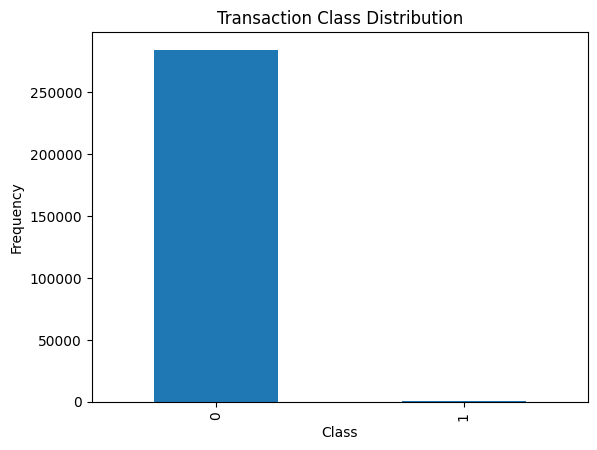

Total Number of Frauds: 492
Total Number of Normal Transactions: 284315


In [ ]:
# Load the data
data = pd.read_csv('/content/Credit card.csv')

# Count and visualize transaction classes
count_classes = data['Class'].value_counts()
count_classes.plot(kind='bar', title="Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Calculate and display the number of fraud and normal transactions
fraud_count = count_classes.get(1, 0)
normal_count = count_classes.get(0, 0)

print(f"Total Number of Frauds: {fraud_count}")
print(f"Total Number of Normal Transactions: {normal_count}")


The output reveals the distribution of transaction classes in the credit card dataset. The dataset contains a highly imbalanced class distribution, with 492 fraudulent transactions and 284,315 normal (authentic) transactions.

 The Class column represents the target variable, where '1' indicates a fraudulent transaction and '0' indicates a normal transaction. This imbalance is visualized using a bar plot, which highlights the disproportionate frequency of normal transactions compared to fraudulent ones.

 The high imbalance suggests that detecting fraud may be challenging, as the model may become biased toward predicting the majority class (normal transactions) unless strategies like oversampling, undersampling, or using a specialized loss function are applied. The low number of fraudulent transactions (492) means that fraud detection models need to be particularly sensitive to small anomalies to identify these rare cases effectively.

In [ ]:
# let's quickly convert the columns to lower case and rename the Class column
# so as to not cause syntax errors
data.columns = map(str.lower, data.columns)
data.rename(columns={'class': 'label'}, inplace=True)

# print first 5 rows to get an initial impression of the data we're dealing with
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Calculate the number of fraud cases
fraud_count = data[data['label'] == 1].shape[0]

# Calculate the total number of transactions
total_count = data.shape[0]

# Calculate the percentage of fraud cases
fraud_percentage = (fraud_count / total_count) * 100

# Print the result
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")


The output reveals that fraudulent transactions make up only 0.17% of the total transactions in the dataset. This percentage is calculated by dividing the number of fraud cases (fraud_count) by the total number of transactions (total_count) and multiplying by 100 to convert it to a percentage.

This very low fraud percentage highlights the highly imbalanced nature of the dataset, where fraudulent transactions are much less frequent compared to normal ones. Such an imbalance can pose challenges for machine learning models, as they may become biased towards predicting the majority class (normal transactions) and fail to detect the minority class (fraudulent transactions) effectively.

In [ ]:
# Separate the data into fraud and normal transactions
fraud = data[data['label'] == 1]
normal = data[data['label'] == 0]
# add a negligible amount to avoid taking the log of 0
data['log10_amount'] = np.log10(data.amount + 0.00001)
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Amount per transaction by class')

# Number of bins for histograms
bins = 50

# Plot histograms for fraud transactions
ax1.hist(fraud['amount'], bins=bins)
ax1.set_title('Fraud')

# Plot histograms for normal transactions
ax2.hist(normal['amount'], bins=bins)
ax2.set_title('Normal')

# Set labels and axis properties
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))  # Set x-axis limits for better visualization
plt.yscale('log')  # Use log scale for y-axis

# Show the plot
plt.show()


The code processes and visualizes the transaction amounts for fraudulent and normal transactions.

It first separates the dataset into two subsets: one containing fraudulent transactions (fraud) and the other containing normal transactions (normal) based on the label column. To avoid taking the logarithm of zero (which is undefined), a small constant (0.00001) is added to the amount column, and the logarithm of the transaction amounts is calculated using np.log10.

This transformation is stored in a new column called log10_amount, which helps in normalizing the distribution of transaction amounts, especially when dealing with wide-ranging values. The next step creates a subplot with two histograms (one for fraudulent transactions and the other for normal transactions) to visualize the distribution of transaction amounts by class.



## **Step 8: Clusters with t-SNE**

t-SNE is a dimensionality reduction method commonly used for visualizing complex datasets. It maps high-dimensional clusters onto a two- or three-dimensional plane, making it easier to observe how well-separated different classes or clusters are.

t-SNE works by trying to preserve the relative distances between points. Points that are close together in high-dimensional space are kept close in the lower-dimensional visualization. This makes it an excellent tool for exploring and interpreting the structure of complex datasets, particularly when working with clustering tasks or identifying patterns.

In [13]:
# Define constants
RATIO_TO_FRAUD = 15
RANDOM_SEED = 42

# Load dataset
df = pd.read_csv("/content/Credit card.csv")

# Drop unnecessary columns
df = df.drop(columns=["Time", "Amount"])

RATIO_TO_FRAUD - Controls the number of non-fraudulent transactions relative to fraud cases (undersampling).

RANDOM_SEED -Ensures reproducibility of the results.

Drops Time and Amount columns because they are not relevant for t-SNE.

In [14]:
# Split dataset into fraud and clean transactions
fraud = df[df["Class"] == 1]
clean = df[df["Class"] == 0]

# Perform undersampling on clean transactions
clean_undersampled = clean.sample(n=len(fraud) * RATIO_TO_FRAUD, random_state=RANDOM_SEED)

# Combine undersampled clean transactions with all fraud transactions
balanced_df = pd.concat([fraud, clean_undersampled])

# Extract features and labels
X = balanced_df.drop(columns=["Class"]).values
y = balanced_df["Class"].values

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

fraud - Subset of transactions labeled as fraud (Class = 1).

clean - Subset of transactions labeled as normal (Class = 0).

Since fraud cases are rare, we take a random subset of non-fraudulent transactions, making sure that:

The total number of normal transactions = fraud cases × RATIO_TO_FRAUD.

This prevents the class imbalance issue.

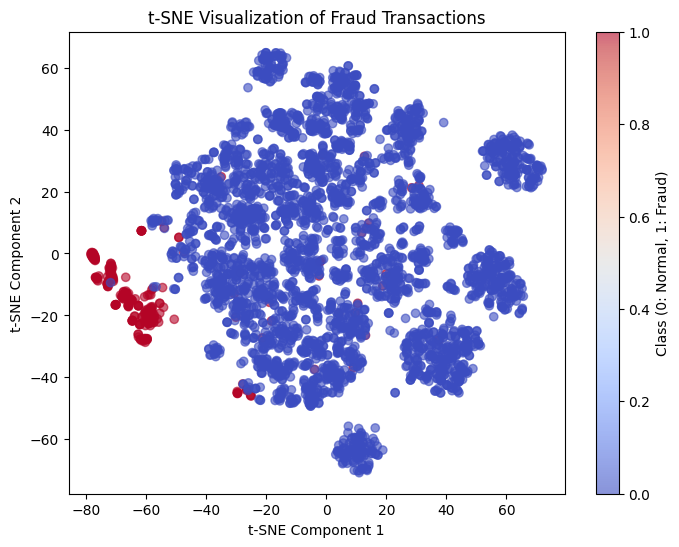

In [15]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=RANDOM_SEED, perplexity=30)
X_embedded = tsne.fit_transform(X_scaled)

# Plot t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Class (0: Normal, 1: Fraud)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Fraud Transactions")
plt.show()

The t-SNE visualization effectively highlights the separation between normal and fraudulent transactions. The majority of transactions (blue points) form a large, dense cluster, indicating that normal transactions share common characteristics.

In contrast, fraudulent transactions (red points) form a distinct, compact cluster on the left, suggesting that they exhibit unique patterns that set them apart from normal activity. However, a few red points are scattered within the blue cluster, indicating potential edge cases or overlapping behaviors between fraud and normal transactions.

This separation suggests that fraud detection models can leverage these differences to identify fraudulent activity effectively. The spread of points across the visualization reflects the natural variations within the dataset, with t-SNE successfully capturing these differences in a lower-dimensional space. While the axes themselves do not have specific meanings, they represent the best possible 2D projection of high-dimensional transaction data. Overall, this visualization demonstrates that fraudulent transactions can be distinguished from normal ones, though some overlap may require further analysis to reduce false positives and improve model accuracy.

## **Step 9: PREDICTION**

In [18]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_SEED)

X_train, X_test, y_train, y_test - Splits dataset into 80% training and 20% testing.

Ensures model is trained and evaluated on separate data to prevent overfitting.

In [19]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Initializes a Logistic Regression model.

Fits (trains) the model on the training data (X_train, y_train).

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


Accuracy - The percentage of correctly predicted transactions.

Confusion Matrix - Shows True Positives, False Positives, True Negatives, False Negatives.

Classification Report - Includes:

Precision (How many detected frauds were actually frauds?)

Recall (How many actual frauds were detected?)

F1-score (Balance of precision & recall)

In [21]:
# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Predict a single transaction (example)
sample_transaction = X_test[0].reshape(1, -1)  # Take the first test sample
prediction = model.predict(sample_transaction)
print(f"\nPrediction for sample transaction: {'Fraud' if prediction[0] == 1 else 'Normal'}")

Accuracy: 0.9884

Confusion Matrix:
[[718   0]
 [  9  51]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       718
         1.0       1.00      0.85      0.92        60

    accuracy                           0.99       778
   macro avg       0.99      0.93      0.96       778
weighted avg       0.99      0.99      0.99       778


Prediction for sample transaction: Normal


The model achieved an accuracy of 98.84%, indicating that it correctly classified most transactions.

The confusion matrix shows that out of 718 normal transactions, all were correctly classified (True Negatives: 718, False Positives: 0). However, for 60 fraudulent transactions, the model correctly identified 51 as fraud (True Positives: 51) but misclassified 9 as normal (False Negatives: 9), meaning some fraud cases were missed.

The classification report highlights a precision of 1.00 for fraud (no false fraud alerts) but a recall of 0.85, meaning 15% of fraud cases were not detected. The F1-score of 0.92 for fraud suggests a well-balanced model, but improving recall could further reduce missed frauds. Finally, the model predicted a sample transaction as "Normal," showing how it applies its learned patterns to new data.